In [25]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_bloch_vector,plot_state_city
import math 
import numpy as np

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

In [20]:
qc.reset(0)
qc.reset(1)

qc.h(0)
qc.cx(0, 1)
qc.u((np.pi/2), (np.pi/2), (np.pi/2), 0)
qc.u((np.pi/2), (np.pi/2), (np.pi/2), 1)
qc.name = "Forwards"

qc.measure(0, 0)
qc.measure(1, 1)
qc.draw()
backend=Aer.get_backend('statevector_simulator')
job=execute(qc,backend,shots=1)

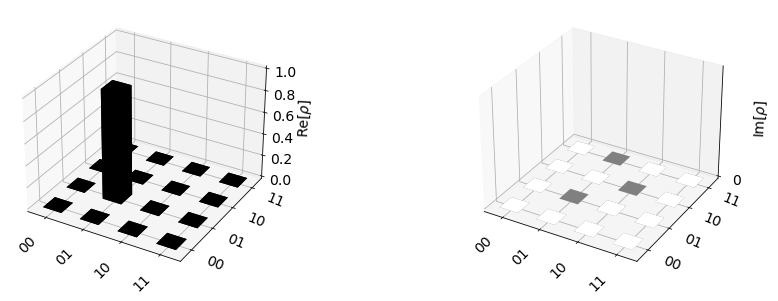

In [33]:
plot_state_city(job.result().get_statevector(),color='01')


In [35]:
job.result().get_statevector()

array([ 0.+0.00000000e+00j,  1.-9.79717439e-16j,  0.+0.00000000e+00j,
       -0.+0.00000000e+00j])

In [37]:
qq = QuantumCircuit(q, c)
qc.initialize(job.result().get_statevector(),[0,1]) #put something here - oke
qq.tdg(0) 
qq.tdg(1)
qq.name = "Backwards"
qq.measure(0, 0)
qq.measure(1, 1)
qq.draw()

┌─────┐┌─┐   
q0_0: ┤ TDG ├┤M├───
      ├─────┤└╥┘┌─┐
q0_1: ┤ TDG ├─╫─┤M├
      └─────┘ ║ └╥┘
c0: 2/════════╩══╩═
              0  1